In [382]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [383]:
data = pd.read_csv('./data/Lottery_Powerball_Winning_Numbers__Beginning_2010.csv')
data

,Draw Date,Winning Numbers,Multiplier
0,09/26/2020,11 21 27 36 62 24,3.0
1,09/30/2020,14 18 36 49 67 18,2.0
2,10/03/2020,18 31 36 43 47 20,2.0
3,10/07/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0
...,...,...,...
1827,08/25/2025,16 19 34 37 64 22,3.0
1828,08/27/2025,09 12 22 41 61 25,4.0
1829,08/30/2025,03 18 22 27 33 17,3.0
1830,09/01/2025,08 23 25 40 53 05,3.0


In [384]:
data = data.set_index('Draw Date')
data

,Winning Numbers,Multiplier
Draw Date,,
09/26/2020,11 21 27 36 62 24,3.0
09/30/2020,14 18 36 49 67 18,2.0
10/03/2020,18 31 36 43 47 20,2.0
10/07/2020,06 24 30 53 56 19,2.0
10/10/2020,05 18 23 40 50 18,3.0
...,...,...
08/25/2025,16 19 34 37 64 22,3.0
08/27/2025,09 12 22 41 61 25,4.0
08/30/2025,03 18 22 27 33 17,3.0


In [385]:
#Check if duplicated values
print(f"Any duplicated values for winning numbers: {data.duplicated('Winning Numbers').sum()}")
print(f"Any duplicated values for multipliers: {data.duplicated('Multiplier').sum()}")

Any duplicated values for winning numbers: 0
Any duplicated values for multipliers: 1826


<Axes: xlabel='Multiplier', ylabel='count'>

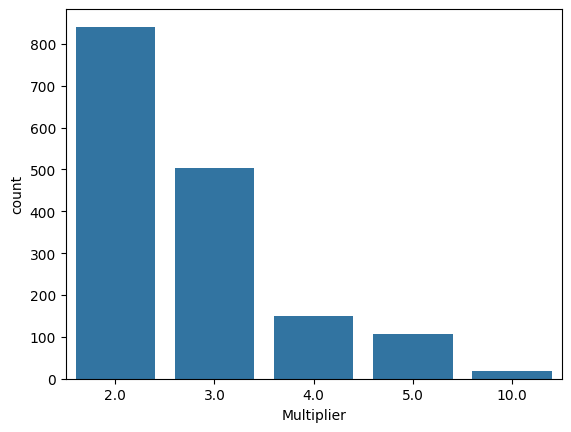

In [386]:
#Multiplier statistics
sns.countplot(data, x='Multiplier')

<Axes: xlabel='Draw Date', ylabel='Multiplier'>

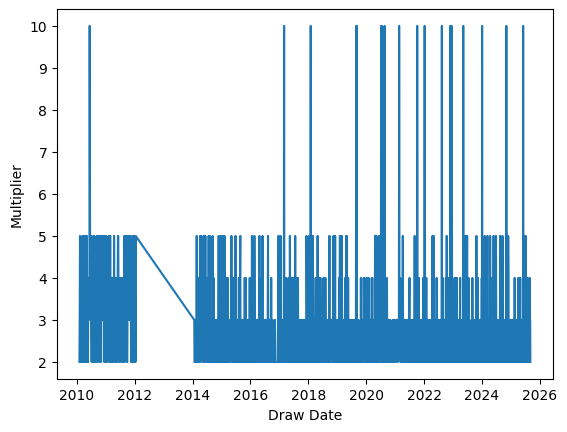

In [387]:
data.index = pd.to_datetime(data.index)
sns.lineplot(data, x = data.index, y='Multiplier')

<Axes: ylabel='Draw Date'>

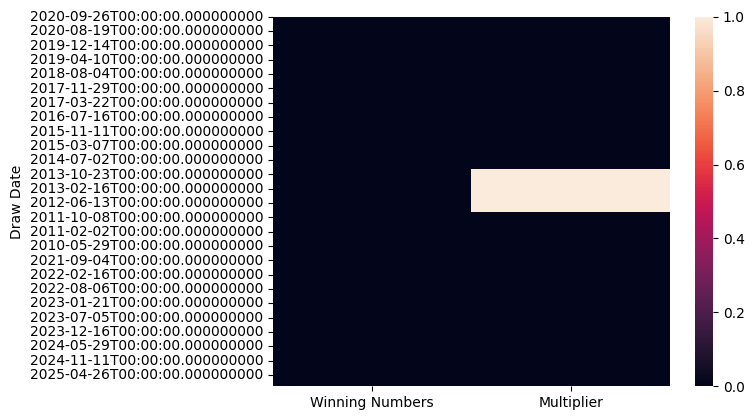

In [388]:
#Possible reduction of multipliers. 
sns.heatmap(data.isnull())

In [389]:
data['Month'] = data.index.month_name()
data

,Winning Numbers,Multiplier,Month
Draw Date,,,
2020-09-26,11 21 27 36 62 24,3.0,September
2020-09-30,14 18 36 49 67 18,2.0,September
2020-10-03,18 31 36 43 47 20,2.0,October
2020-10-07,06 24 30 53 56 19,2.0,October
2020-10-10,05 18 23 40 50 18,3.0,October
...,...,...,...
2025-08-25,16 19 34 37 64 22,3.0,August
2025-08-27,09 12 22 41 61 25,4.0,August
2025-08-30,03 18 22 27 33 17,3.0,August


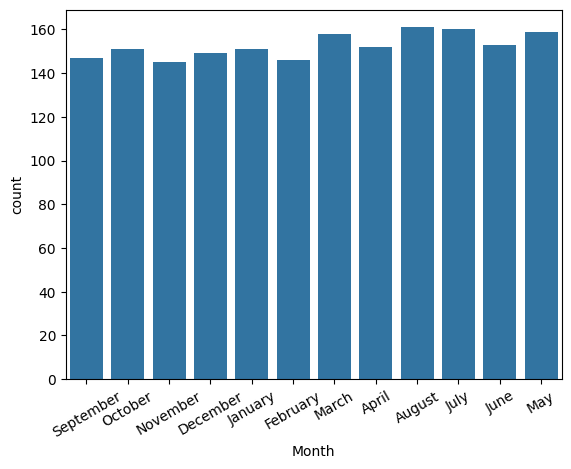

In [390]:
ax = sns.countplot(data, x=data.Month)
plt.xticks(rotation = 30)
plt.show()

In [391]:
numbers = pd.DataFrame()
numbers['Winning Numbers'] = data['Winning Numbers'].str.split(' ', expand=True).stack()
numbers.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10992 entries, (Timestamp('2020-09-26 00:00:00'), 0) to (Timestamp('2025-09-03 00:00:00'), 5)
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Winning Numbers  10992 non-null  object
dtypes: object(1)
memory usage: 197.1+ KB


In [392]:
numbers.columns

Index(['Winning Numbers'], dtype='object')

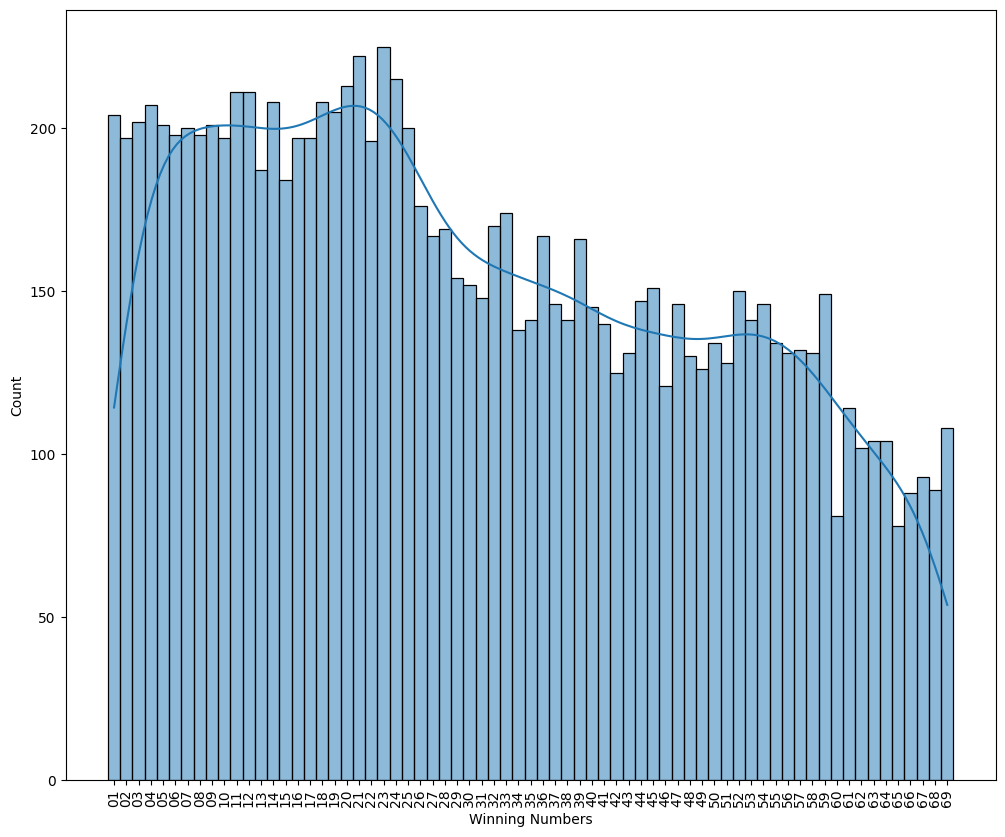

In [393]:
plt.figure(figsize=(12,10))
sns.histplot(numbers['Winning Numbers'].sort_values(), kde=True)
plt.xticks(rotation = 90)
plt.show()

In [394]:
numbers = numbers.set_index(numbers['Winning Numbers'])
numbers

,Winning Numbers
Winning Numbers,
11,11
21,21
27,27
36,36
62,62
...,...
16,16
29,29
61,61


In [395]:
numbers.columns

Index(['Winning Numbers'], dtype='object')

In [396]:
sorted_numbers = pd.DataFrame()
sorted_numbers['Count'] = numbers['Winning Numbers'].value_counts()
sorted_numbers.sort_index()

,Count
Winning Numbers,
01,204
02,197
03,202
04,207
05,201
...,...
65,78
66,88
67,93


In [397]:
sorted_numbers.Count.idxmax()

'23'

In [398]:
sorted_numbers['Count'] = sorted_numbers['Count'].astype(int)
sorted_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 23 to 65
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   69 non-null     int64
dtypes: int64(1)
memory usage: 1.1+ KB


In [399]:
print(f'The most chosen number was {sorted_numbers.Count.idxmax()}')
print(f'The lowest chosen number was {sorted_numbers.Count.idxmin()}')

The most chosen number was 23
The lowest chosen number was 65


In [400]:
#Top 5 values
max_values = sorted_numbers.Count.sort_values(ascending=False)[:5]
max_values

Winning Numbers
23    225
21    222
24    215
20    213
11    211
Name: Count, dtype: int64

In [401]:
data = data.reset_index(drop=True)
numbers = data['Winning Numbers'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True)
numbers = numbers.astype(int)  # convert to integers
data = data.drop(columns=['Winning Numbers']).join(numbers.rename('Winning Numbers'))

data

,Multiplier,Month,Winning Numbers
0,3.0,September,11
0,3.0,September,21
0,3.0,September,27
0,3.0,September,36
0,3.0,September,62
...,...,...,...
1831,2.0,September,16
1831,2.0,September,29
1831,2.0,September,61
1831,2.0,September,69


In [402]:
data_by_month = data.groupby('Month')['Winning Numbers'].count()
data_by_month

Month
April        912
August       966
December     894
February     876
January      906
July         960
June         918
March        948
May          954
November     870
October      906
September    882
Name: Winning Numbers, dtype: int64

In [403]:
import calendar

month_order = list(calendar.month_name)[1:]
data.Month = pd.Categorical(data.Month, categories=month_order, ordered=True)

data['Winning Numbers'] = data['Winning Numbers'].astype(int)
top_number_per_month = data.groupby('Month')['Winning Numbers'].agg(lambda x: x.value_counts().idxmax()).reset_index()
top_number_per_month

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_1815/767044255.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_number_per_month = data.groupby('Month')['Winning Numbers'].agg(lambda x: x.value_counts().idxmax()).reset_index()


,Month,Winning Numbers
0,January,12
1,February,17
2,March,11
3,April,1
4,May,23
5,June,25
6,July,4
7,August,24
8,September,22
9,October,18


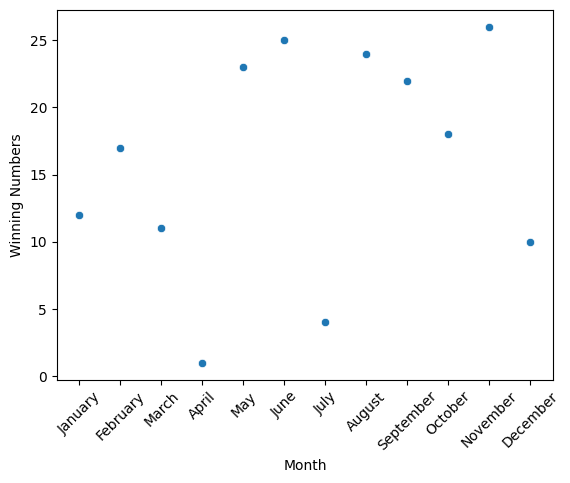

In [404]:
ax = sns.scatterplot(top_number_per_month, x=top_number_per_month.Month, y = top_number_per_month['Winning Numbers'])
plt.xticks(rotation = 45)
plt.show()